# Assignment 2 - Machine Learning Practical
Due Date: Tuesday April 2nd @ 11:59 PM on blackboard

The goal of this assignment is to experiment with your previous Linear Regression and Logistic regression models to explore some of the practical skills previously covered in the course:
- Learning curves
- Regularization
- Model selection

For this assignment, you are given some boilerplate code in the form of a jupyter notebook. Your task is to fill in the blanks.

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import sklearn.preprocessing
import sklearn.model_selection


import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2
from keras.optimizers import SGD

def logistic_regression(num_inputs, regularization, learning_rate):
  model = Sequential()
  model.add(Dense(1, input_shape=(num_inputs,), activation='sigmoid', kernel_regularizer=l2(regularization)))
  model.compile(optimizer=SGD(learning_rate), loss='binary_crossentropy', metrics=['acc', keras.metrics.binary_crossentropy])
  return model

In [159]:
# This cell loads the data
import pandas as pd
import numpy as np
import sklearn.datasets
dataset = sklearn.datasets.load_breast_cancer()
X = dataset['data']
y = dataset['target']
print(X.shape)
print(y.shape)

(569, 30)
(569,)


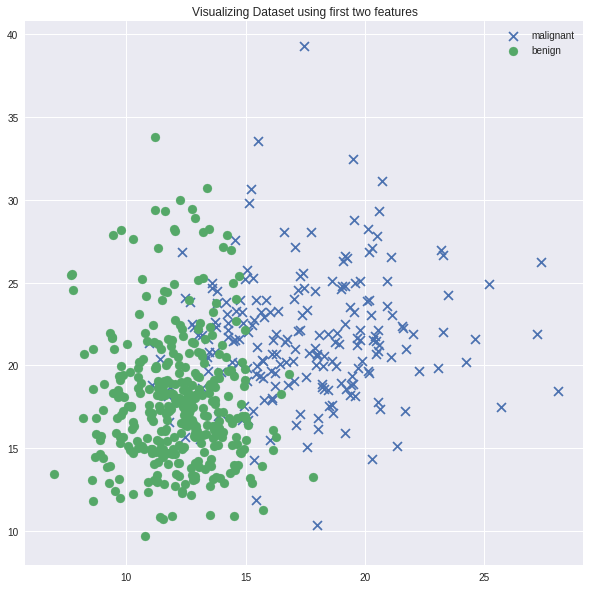

In [160]:
# This cell visualizes the first two features of the dataset. There are actually 30 features.
f, ax = plt.subplots(1,1, figsize=(10, 10))
malignant = X[y == 0]
benign = X[y == 1]
ax.scatter(malignant[:, 0], malignant[:, 1], marker='x', s=80, label='malignant')
ax.scatter(benign[:, 0], benign[:, 1], marker='o', s=80, label='benign')
ax.set_title("Visualizing Dataset using first two features")
ax.legend();

In [161]:
# This code creates a logistic regression model to train on the first two inputs features, with 0 regularization, and a learning rate of 0.0001
# See the keras documentation for how to use model.fit
# https://keras.io/models/model/#fit

model = logistic_regression(num_inputs=2, regularization=0, learning_rate=0.0001)
history = model.fit(X[:, [0,1]], y, epochs=5, batch_size=16, validation_split=0.2)

# The fit function returns a 'history' object that contains the metrics tracked during training

print('validation accuracy', history.history['val_acc'])
print('training accuracy', history.history['acc'])
print("These are the different metrics you can extract from the history object:", history.history.keys())

Train on 455 samples, validate on 114 samples
Epoch 1/5
455/455 [==============================] - 2s 5ms/step - loss: 1.4240 - acc: 0.5429 - binary_crossentropy: 1.4240 - val_loss: 1.3258 - val_acc: 0.5789 - val_binary_crossentropy: 1.3258
Epoch 2/5
455/455 [==============================] - 0s 87us/step - loss: 1.3401 - acc: 0.5516 - binary_crossentropy: 1.3401 - val_loss: 1.2397 - val_acc: 0.5877 - val_binary_crossentropy: 1.2397
Epoch 3/5
455/455 [==============================] - 0s 89us/step - loss: 1.2793 - acc: 0.5538 - binary_crossentropy: 1.2793 - val_loss: 1.1718 - val_acc: 0.6140 - val_binary_crossentropy: 1.1718
Epoch 4/5
455/455 [==============================] - 0s 86us/step - loss: 1.2326 - acc: 0.5670 - binary_crossentropy: 1.2326 - val_loss: 1.1206 - val_acc: 0.6228 - val_binary_crossentropy: 1.1206
Epoch 5/5
455/455 [==============================] - 0s 107us/step - loss: 1.1982 - acc: 0.5758 - binary_crossentropy: 1.1982 - val_loss: 1.0783 - val_acc: 0.6316 - val_bi

In [0]:
# Create polynomial features
poly = sklearn.preprocessing.PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Split into training and validation data
X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(X_poly, y)


In [163]:
# You should use X_train, y_train and X_val, y_val from now on, for your training set/validation sets respectively
X_val.shape

(143, 496)

In [0]:
# Normalize your data IN THIS CELL by subtracting the mean and dividing by the standard deviation.
# Normalize it in place (so use the same variable names X_train, X_val, etc)

# TODO: Done 
# Reference for logic 
# https://stats.stackexchange.com/questions/174823/how-to-apply-standardization-normalization-to-train-and-testset-if-prediction-i
# As per the discussion we need to use the same mean and standard deviation for traning and test/validation data as they have same statistics


mean_X = np.mean(X_train)
standard_deviation_X = np.std(X_train)

mean_Y = np.mean(y_train)
standard_deviation_Y = np.std(y_train)

X_train = (X_train - mean_X)/standard_deviation_X
X_val = (X_val - mean_X)/standard_deviation_X


y_train = (y_train - mean_Y)/standard_deviation_Y
y_val = (y_val - mean_Y)/standard_deviation_Y



Train on 340 samples, validate on 86 samples
Epoch 1/50
340/340 [==============================] - 4s 11ms/step - loss: 0.2470 - acc: 0.0000e+00 - binary_crossentropy: 0.2470 - val_loss: 0.1734 - val_acc: 0.0000e+00 - val_binary_crossentropy: 0.1734
Epoch 2/50
340/340 [==============================] - 0s 74us/step - loss: 0.0423 - acc: 0.0000e+00 - binary_crossentropy: 0.0423 - val_loss: 0.1556 - val_acc: 0.0000e+00 - val_binary_crossentropy: 0.1556
Epoch 3/50
340/340 [==============================] - 0s 61us/step - loss: 0.0180 - acc: 0.0000e+00 - binary_crossentropy: 0.0180 - val_loss: 0.1571 - val_acc: 0.0000e+00 - val_binary_crossentropy: 0.1571
Epoch 4/50
340/340 [==============================] - 0s 62us/step - loss: 0.0042 - acc: 0.0000e+00 - binary_crossentropy: 0.0042 - val_loss: 0.1613 - val_acc: 0.0000e+00 - val_binary_crossentropy: 0.1613
Epoch 5/50
340/340 [==============================] - 0s 61us/step - loss: -0.0109 - acc: 0.0000e+00 - binary_crossentropy: -0.0109 - v

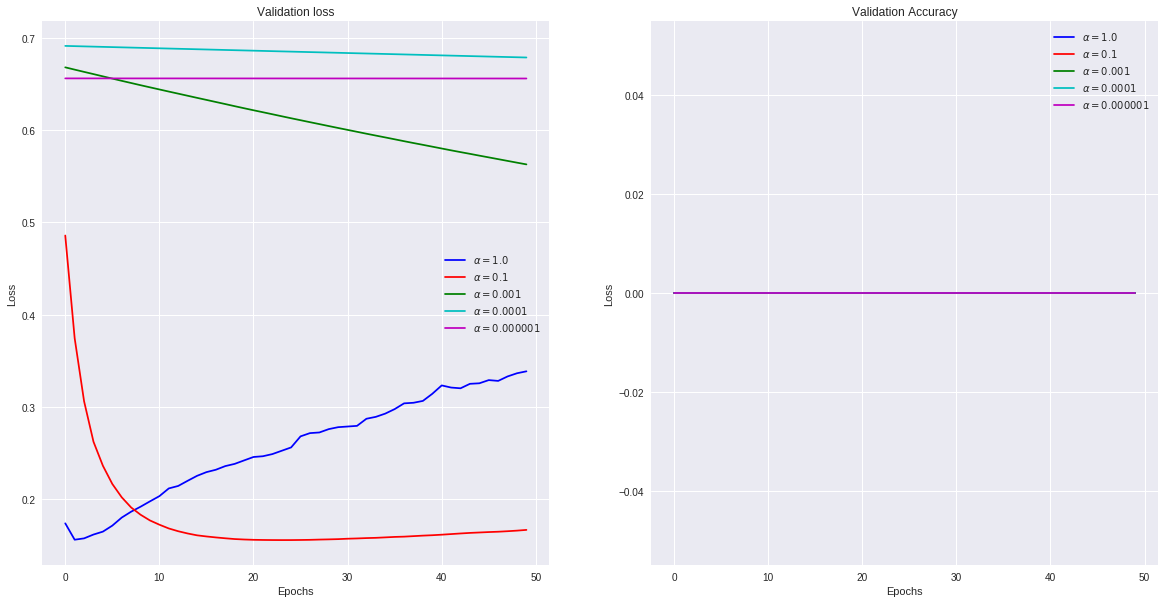

In [172]:
# Train 5 logistic regression models in a for loop on this data with, with 0 regularization, and vary the value of the 
# learning rate using the values 1.0, 0.1, 0.001, 0.0001, 0.000001
# Use a batch size of 32
# Train for 50 epochs
# plot the validation loss for all 5 models on one plot, and the validation accuracy for all 5 models on a separate plot
# Modify the code IN THIS CELL for this task, you should replace the repeated code with a for loop

# Plot 5 curves on the same plot
f, ax = plt.subplots(1, 2, figsize=(20, 10))

ax[0].set_title("Validation loss")

learning_rate = [1.0, 0.1, 0.001, 0.0001, 0.000001]
for x in learning_rate:
  model = logistic_regression(num_inputs=2, regularization=0, learning_rate= x)
  history = model.fit(X_train[:, [0,1]], y_train, epochs=50, batch_size=32, validation_split=0.2)
  if x == 1.0:
    ax[0].plot(history.history['val_loss'], 'b', label=r'$\alpha = 1.0$')  
  elif x == 0.1:
    ax[0].plot(history.history['val_loss'], 'r', label=r'$\alpha = 0.1$') 
  elif x == 0.001:
    ax[0].plot(history.history['val_loss'], 'g', label=r'$\alpha = 0.001$') 
  elif x == 0.0001:
    ax[0].plot(history.history['val_loss'], 'c', label=r'$\alpha = 0.0001$')
  else: 
    ax[0].plot(history.history['val_loss'], 'm', label=r'$\alpha = 0.000001$')
    
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend();
#print(history.history.keys())
#history.history['val_acc']

ax[1].set_title("Validation Accuracy")

for x in learning_rate:
  model = logistic_regression(num_inputs=2, regularization=0, learning_rate= x)
  history = model.fit(X_train[:, [0,1]], y_train, epochs=50, batch_size=32, validation_split=0.2)
  if x == 1.0:
    ax[1].plot(history.history['val_acc'], 'b', label=r'$\alpha = 1.0$')  
  elif x == 0.1:
    ax[1].plot(history.history['val_acc'], 'r', label=r'$\alpha = 0.1$') 
  elif x == 0.001:
    ax[1].plot(history.history['val_acc'], 'g', label=r'$\alpha = 0.001$') 
  elif x == 0.0001:
    ax[1].plot(history.history['val_acc'], 'c', label=r'$\alpha = 0.0001$')
  else: 
    ax[1].plot(history.history['val_acc'], 'm', label=r'$\alpha = 0.000001$')
    
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend();


Train on 340 samples, validate on 86 samples
Epoch 1/50
340/340 [==============================] - 4s 12ms/step - loss: 1.0637 - acc: 0.0000e+00 - binary_crossentropy: 0.6004 - val_loss: 0.5021 - val_acc: 0.0000e+00 - val_binary_crossentropy: 0.4918
Epoch 2/50
340/340 [==============================] - 0s 74us/step - loss: 0.4085 - acc: 0.0000e+00 - binary_crossentropy: 0.4062 - val_loss: 0.3778 - val_acc: 0.0000e+00 - val_binary_crossentropy: 0.3778
Epoch 3/50
340/340 [==============================] - 0s 64us/step - loss: 0.3014 - acc: 0.0000e+00 - binary_crossentropy: 0.3013 - val_loss: 0.3082 - val_acc: 0.0000e+00 - val_binary_crossentropy: 0.3081
Epoch 4/50
340/340 [==============================] - 0s 62us/step - loss: 0.2315 - acc: 0.0000e+00 - binary_crossentropy: 0.2314 - val_loss: 0.2638 - val_acc: 0.0000e+00 - val_binary_crossentropy: 0.2637
Epoch 5/50
340/340 [==============================] - 0s 64us/step - loss: 0.1828 - acc: 0.0000e+00 - binary_crossentropy: 0.1827 - val

"\n# The code below plots two curves on each subplot, and labels them\nindices = np.float32(range(100))\n\nax[0].plot(indices, np.cos(indices/100.), 'b', label='train loss') # You should replace these artificial cos/sin functions with your actual loss values!\nax[0].plot(indices, np.cos(indices/100. + 0.5), 'g', label='validation loss')\nax[0].set_title('$\\lambda$ = 1.0')\nax[0].set_xlabel('Epochs')\nax[0].set_ylabel('Loss')\nax[0].legend()\n\nax[1].plot(indices, np.sin(indices/100.), 'b', label='train loss')\nax[1].plot(indices, np.sin(indices/100. + 0.5), 'g', label='validation loss')\nax[1].set_title('$\\lambda$ = 0.1')\nax[1].set_xlabel('Epochs')\nax[1].set_ylabel('Loss')\nax[1].legend();\n"

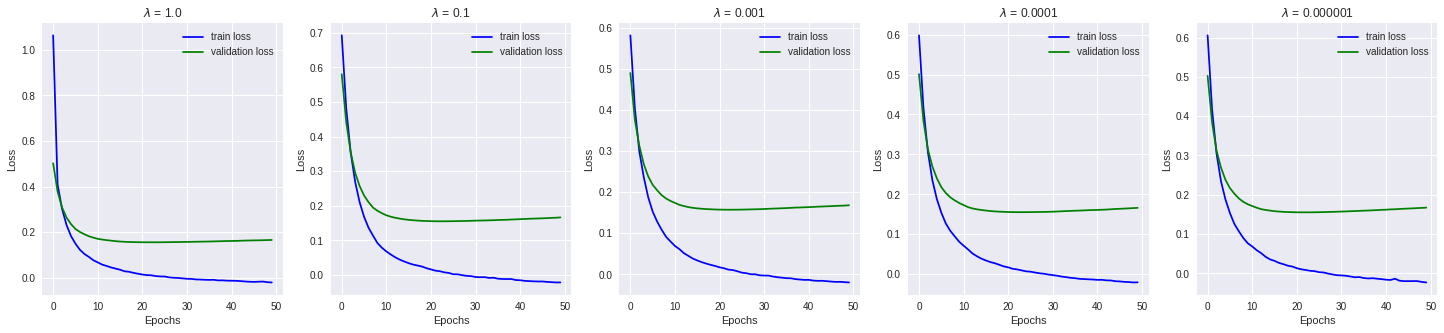

In [176]:
# Choose the best learning rate from the previous experiment

# Train 5 logistic regression models on this data with the following values for lambda: 1.0, 0.1, 0.001, 0.0001, 0.000001
# Plot your learning curve for each model (train and validation loss together, so 2 curves on each plot)
# Use a batch size of 32
# Train for 50 epochs
# Modify the code IN THIS CELL for this task


# from the previous plots we will select learning rate alpha to be 0.1

f, ax = plt.subplots(1, 5, figsize=(25, 5))
lambda_values = [1.0, 0.1, 0.001, 0.0001, 0.000001]
alpha = 0.1
for L in lambda_values:
  model = logistic_regression(num_inputs=2, regularization=L, learning_rate= alpha)
  history = model.fit(X_train[:, [0,1]], y_train, epochs=50, batch_size=32, validation_split=0.2)
  if L == 1.0:
    ax[0].plot(history.history['loss'], 'b', label='train loss')
    ax[0].plot(history.history['val_loss'], 'g', label='validation loss')
    ax[0].set_title('$\lambda$ = 1.0')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].legend();
  elif L == 0.1:
    ax[1].plot(history.history['loss'], 'b', label='train loss')
    ax[1].plot(history.history['val_loss'], 'g', label='validation loss') 
    ax[1].set_title('$\lambda$ = 0.1')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss')
    ax[1].legend();
  elif L == 0.001:
    ax[2].plot(history.history['loss'], 'b', label='train loss')
    ax[2].plot(history.history['val_loss'], 'g', label='validation loss')
    ax[2].set_title('$\lambda$ = 0.001')
    ax[2].set_xlabel('Epochs')
    ax[2].set_ylabel('Loss')
    ax[2].legend();
  elif L == 0.0001:
    ax[3].plot(history.history['loss'], 'b', label='train loss')
    ax[3].plot(history.history['val_loss'], 'g', label='validation loss')
    ax[3].set_title('$\lambda$ = 0.0001')
    ax[3].set_xlabel('Epochs')
    ax[3].set_ylabel('Loss')
    ax[3].legend();
  else: 
    ax[4].plot(history.history['loss'], 'b', label='train loss')
    ax[4].plot(history.history['val_loss'], 'g', label='validation loss')
    ax[4].set_title('$\lambda$ = 0.000001')
    ax[4].set_xlabel('Epochs')
    ax[4].set_ylabel('Loss')
    ax[4].legend();
    
